PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#create your own MLP(multilayer perceptron) in keras

from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv("forestfires.csv")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# EDA

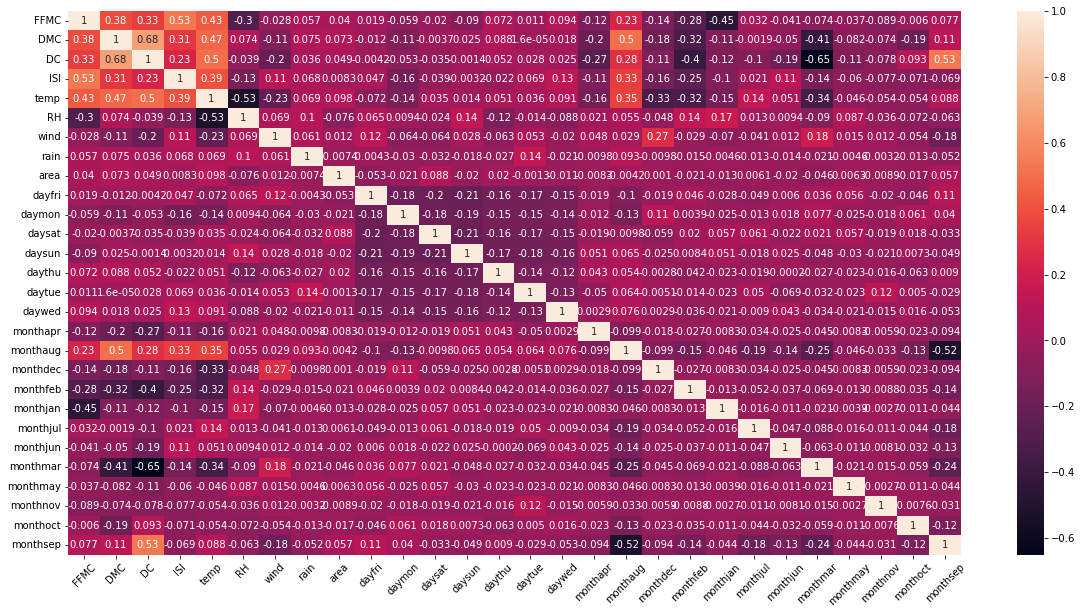

In [7]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45);

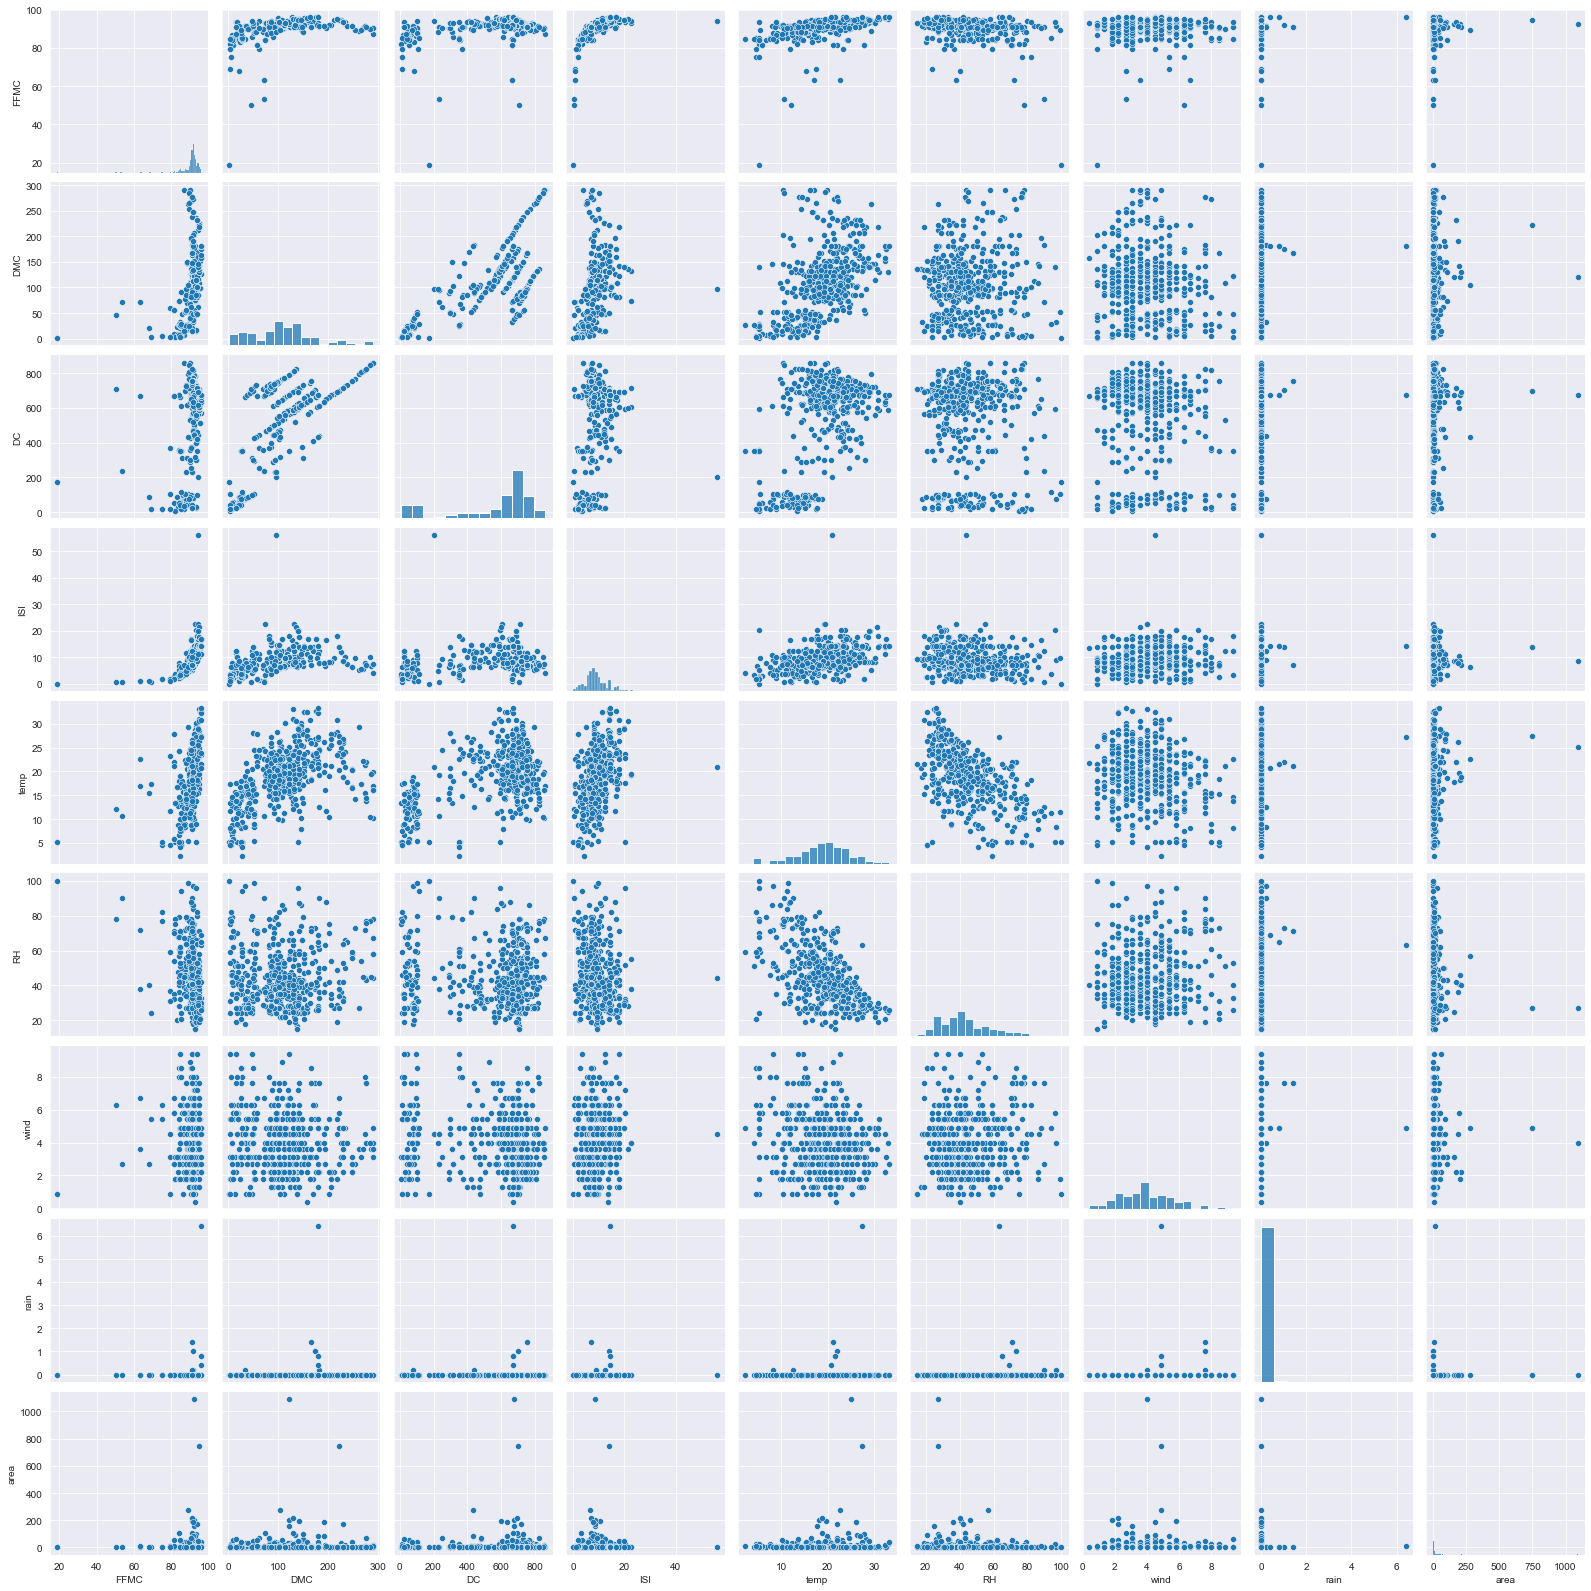

In [8]:
sns.set_style('darkgrid')
sns.pairplot(data.iloc[:,0:11])
plt.show()

In [9]:
data.shape

(517, 31)

In [10]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
df=data.copy()

In [12]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [13]:
df=df.drop(columns=['month','day'],axis=1)

In [14]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['size_category']=label_encoder.fit_transform(df['size_category'])

In [16]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


# splitting the train and test data

In [17]:
X=df.drop('size_category',axis=1)
y=df['size_category']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
#create model
from keras.models import Sequential
model = Sequential()
model.add(Dense(42, input_dim=28, activation = 'relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1218      
                                                                 
 dense_1 (Dense)             (None, 28)                1204      
                                                                 
 dense_2 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#Fit the model
history=model.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)


Epoch 1/180
28/28 [==============================] - 3s 18ms/step - loss: 2.6169 - accuracy: 0.6051 - val_loss: 1.1075 - val_accuracy: 0.7007
Epoch 2/180
28/28 [==============================] - 0s 3ms/step - loss: 1.1261 - accuracy: 0.7101 - val_loss: 0.6635 - val_accuracy: 0.7445
Epoch 3/180
28/28 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7935 - val_loss: 0.4921 - val_accuracy: 0.8321
Epoch 4/180
28/28 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.8152 - val_loss: 0.6001 - val_accuracy: 0.8467
Epoch 5/180
28/28 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.8478 - val_loss: 0.9041 - val_accuracy: 0.8102
Epoch 6/180
28/28 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8913 - val_loss: 0.3704 - val_accuracy: 0.9197
Epoch 7/180
28/28 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8913 - val_loss: 0.6776 - val_accuracy: 0.8394
Epoch 8/180


Epoch 59/180
28/28 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9601 - val_loss: 0.1805 - val_accuracy: 0.9489
Epoch 60/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9819 - val_loss: 0.1293 - val_accuracy: 0.9635
Epoch 61/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9928 - val_loss: 0.1226 - val_accuracy: 0.9635
Epoch 62/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9746 - val_loss: 0.1159 - val_accuracy: 0.9781
Epoch 63/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9710 - val_loss: 1.5002 - val_accuracy: 0.8394
Epoch 64/180
28/28 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.9855 - val_loss: 0.1224 - val_accuracy: 0.9635
Epoch 65/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9855 - val_loss: 0.1403 - val_accuracy: 0.9562
Epoch 

28/28 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0873 - val_accuracy: 0.9708
Epoch 174/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9855 - val_loss: 0.0663 - val_accuracy: 0.9708
Epoch 175/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9855 - val_loss: 0.0624 - val_accuracy: 0.9708
Epoch 176/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9891 - val_loss: 0.0663 - val_accuracy: 0.9635
Epoch 177/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0692 - val_accuracy: 0.9708
Epoch 178/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9746 - val_loss: 0.3479 - val_accuracy: 0.9416
Epoch 179/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 180/180

In [23]:
# evaluate the model

scores=model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


13/13 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9831
accuracy: 98.31%


In [24]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

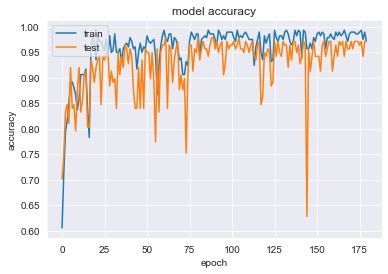

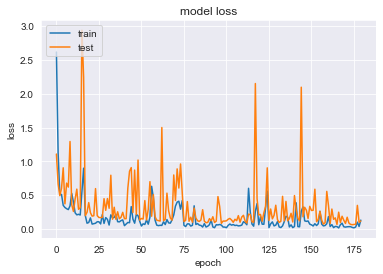

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion:
    
We have predicted the result with 94% accuracy here epoch=180


# HYPER PARAMETER TUNING

In [26]:
X1 = df.drop('size_category', axis=1)
y1 = df['size_category']

In [27]:
#standardization
from sklearn.preprocessing import StandardScaler
a=StandardScaler()
a.fit(X1)
X_standardized=a.transform(X1)

In [28]:
pd.DataFrame(X_standardized).describe()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [29]:
#### Tuning of Hyperparameters :- Batch Size and Epochs


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [32]:
# create model
def create_model():
    model=Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
    

In [33]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose=0)
# Define the grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]

# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_results=grid.fit(X_standardized,y1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.923 total time=   1.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.856 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.767 total time=   1.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.816 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.874 total time=   1.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.864 total time=   2.6s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.883 total time=   2.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.864 total time=   2.3s


In [34]:
# Summarize the results
print('Best: {},using{}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best: 0.9167102336883545,using{'batch_size': 10, 'epochs': 100}
0.8470313668251037,0.05286542298392147 with: {'batch_size': 10, 'epochs': 10}
0.8779686450958252,0.06756789476536668 with: {'batch_size': 10, 'epochs': 50}
0.9167102336883545,0.043653505843336035 with: {'batch_size': 10, 'epochs': 100}
0.8315533995628357,0.0639553140133388 with: {'batch_size': 20, 'epochs': 10}
0.8896377921104431,0.04615445121384256 with: {'batch_size': 20, 'epochs': 50}
0.9167102336883545,0.042696653548278625 with: {'batch_size': 20, 'epochs': 100}
0.7578603386878967,0.09301402378604653 with: {'batch_size': 40, 'epochs': 10}
0.8896751284599305,0.05021420187943515 with: {'batch_size': 40, 'epochs': 50}
0.8838685631752015,0.04059188342838673 with: {'batch_size': 40, 'epochs': 100}


In [35]:
#### Tuning of Hyperparameters:- Learning rate and Drop out rate


In [36]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   0.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   0.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   0.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [37]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.7831777453422546, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7462658762931824,0.1312474189726401 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7831777453422546,0.0843897401248992 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7461538434028625,0.14659094873296363 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.759727418422699,0.15385893687393976 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7267363667488098,0.14768493445160774 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [38]:
#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer


In [39]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   1.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   0.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   0.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.583 total time=   0.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.689 total time=   0.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.709 total time=   1.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.952 total time=   1.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.740 total time=   0.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.583 total time=   1.1s
[CV 4/5; 11/12] START activation_f

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7423076868057251, using {'activation_function': 'tanh', 'init': 'uniform'}
0.5305825233459472,0.2757845556417363 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.5305825233459472,0.2757845556417363 with: {'activation_function': 'softmax', 'init': 'normal'}
0.5208737850189209,0.2766888088877092 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7423076868057251,0.11821445544151538 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7306945443153381,0.12328663331546583 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7307318925857544,0.11405728279954783 with: {'activation_

In [41]:
#### Tuning of Hyperparameter :-Number of Neurons in activation layer


In [42]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.573 total time=   1.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.709 total time=   1.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [43]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7539395093917847, using {'neuron1': 8, 'neuron2': 8}
0.7422330021858216,0.14159787503788338 with: {'neuron1': 4, 'neuron2': 2}
0.7441747546195984,0.14119122224657613 with: {'neuron1': 4, 'neuron2': 4}
0.7519977450370788,0.11701762561454827 with: {'neuron1': 4, 'neuron2': 8}
0.7481329202651977,0.11386488121195477 with: {'neuron1': 8, 'neuron2': 2}
0.7403659343719482,0.12071682790259494 with: {'neuron1': 8, 'neuron2': 4}
0.7539395093917847,0.1144017408599161 with: {'neuron1': 8, 'neuron2': 8}
0.7481142759323121,0.1188576892530147 with: {'neuron1': 16, 'neuron2': 2}
0.7365384578704834,0.10440085761036214 with: {'neuron1': 16, 'neuron2': 4}
0.7520351052284241,0.10609014426628408 with: {'neuron1': 16, 'neuron2': 8}


In [44]:
#### Training model with optimum values of Hyperparameters


In [45]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,y1)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y1,y_predict))

17/17 [==============================] - 0s 2ms/step
0.781431334622824


In [46]:
# Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   1.4s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.3s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, lear

[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.2s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.3s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.864 total time=   2.0s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.962 total time=   1.5s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.788 total time=   1.8s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.874 total time=   1.2s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.923 total time=   1.4s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.769 total time=   1.3s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, 

[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.748 total time=   1.2s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.702 total time=   1.2s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.740 total time=   1.2s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.777 total time=   1.6s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.894 total time=   1.3s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   1.4s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuro

[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   1.2s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   1.3s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.4s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.3s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16,

[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.874 total time=   1.3s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.981 total time=   1.2s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.798 total time=   1.2s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 5/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.835 total time=   1.4s
[CV 1/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.971 total time=   1.5s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.769 total time=   1.2s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3

[CV 5/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.738 total time=   1.2s
[CV 1/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.760 total time=   1.3s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.779 total time=   1.2s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5

[CV 5/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.3s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.2s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5

[CV 5/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.3s
[CV 1/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[C

[CV 5/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   1.2s
[CV 1/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   1.1s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   1.4s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 66/8

[CV 5/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   1.4s
[CV 1/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   1.4s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5

[CV 5/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.2s
[CV 1/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   1.2s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   1.2s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 76/8748] E

[CV 5/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s
[CV 1/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   1.3s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 81/8

[CV 5/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.757 total time=   3.1s
[CV 1/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.990 total time=   3.1s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   3.1s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8,

[CV 5/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.728 total time=   4.2s
[CV 1/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   3.0s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.846 total time=   3.0s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neu

[CV 5/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.845 total time=   3.0s
[CV 1/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.846 total time=   3.3s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuro

[CV 5/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.845 total time=   3.1s
[CV 1/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.962 total time=   2.9s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.769 total time=   3.0s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 5/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.825 total time=   3.1s
[CV 1/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.971 total time=   4.4s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.769 total time=   4.4s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, 

[CV 5/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.728 total time=   3.2s
[CV 1/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.981 total time=   3.1s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   3.1s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4,

[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.718 total time=   4.2s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.962 total time=   4.0s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   4.1s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuro

[CV 5/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.854 total time=   3.1s
[CV 1/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.962 total time=   3.4s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.837 total time=   3.2s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 5/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.874 total time=   3.8s
[CV 1/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   4.0s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.827 total time=   3.9s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16,

[CV 5/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.621 total time=   3.1s
[CV 1/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   3.1s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.760 total time=   3.8s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[

[CV 5/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.738 total time=   4.4s
[CV 1/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   3.0s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


[CV 5/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   3.0s
[CV 1/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   3.0s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 5/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   3.0s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   3.3s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5

[CV 5/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   3.3s
[CV 1/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   4.0s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   4.0s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[C

[CV 5/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   3.0s
[CV 1/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   3.1s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 156/

[CV 5/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   4.0s
[CV 1/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   3.9s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   4.3s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5